In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [19]:
red_wine_new = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 2/Sprint 2/red_wine_modified.csv')
red_wine_new.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,alcohol_level,ph_level,wine_type
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,regular,high,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,regular,regular,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,regular,regular,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,regular,regular,red
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,regular,high,red


In [20]:
red_wine_new.drop(columns=["Unnamed: 0", "alcohol_level","ph_level","wine_type", "quality"], inplace=True)

In [21]:
red_wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,low


In [22]:
print(red_wine_new.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_label'],
      dtype='object')


In [23]:
red_wine_new.drop(columns=["residual sugar"], inplace=True)

In [24]:
red_wine_new[['quality_label']].tail()

,quality_label
1354,medium
1355,low
1356,medium
1357,low
1358,medium


In [25]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oe = OrdinalEncoder(categories=[["low", "medium", "high"]], dtype=int) # this is how you can define the label order
red_wine_new['quality_label'] = oe.fit_transform(red_wine_new[['quality_label']])

red_wine_new[['quality_label']].head()

,quality_label
0,0
1,0
2,0
3,1
4,0


In [26]:
# split data
from sklearn.model_selection import train_test_split

X = red_wine_new.drop('quality_label', axis=1)
y = red_wine_new['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# # data normalisation with sklearn
# from sklearn.preprocessing import MinMaxScaler

# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# # transform training data
# X_train_norm = norm.transform(X_train)

# # transform testing data
# X_test_norm = norm.transform(X_test)

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# define model
LR_model = LogisticRegression(max_iter=15000)
# fit model
LR_model.fit(X_train, y_train)
# make predictions
LR_preds = LR_model.predict(X_test)

In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# define model
RF_clf = RandomForestClassifier(random_state=42)
# fit model
RF_clf.fit(X_train, y_train)
# make predictions
RF_preds = RF_clf.predict(X_test)

In [30]:
# from sklearn.model_selection import RandomizedSearchCV
# param_dist = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }
# random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=5, n_jobs=-1)
# random_search.fit(X_train, y_train)
# print("Best Parameters:", random_search.best_params_)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

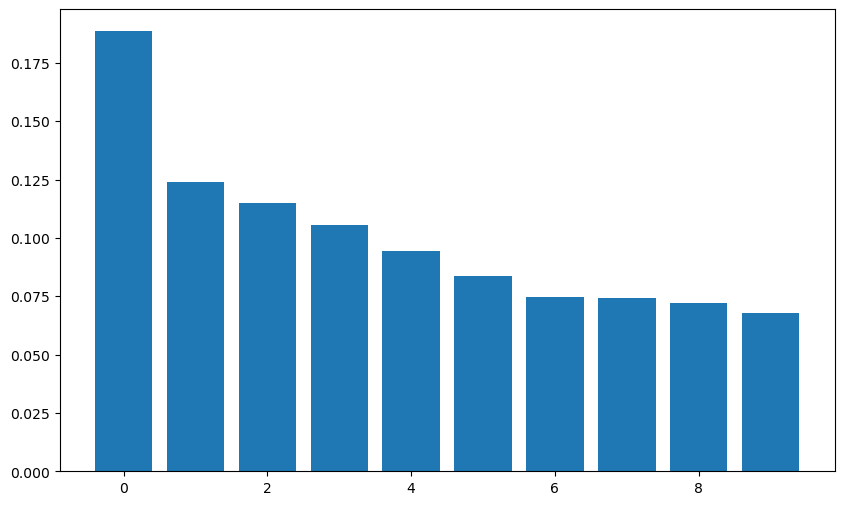

In [31]:
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier().fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Feature Importance')
plt.show()

<Axes: ylabel='Feature'>

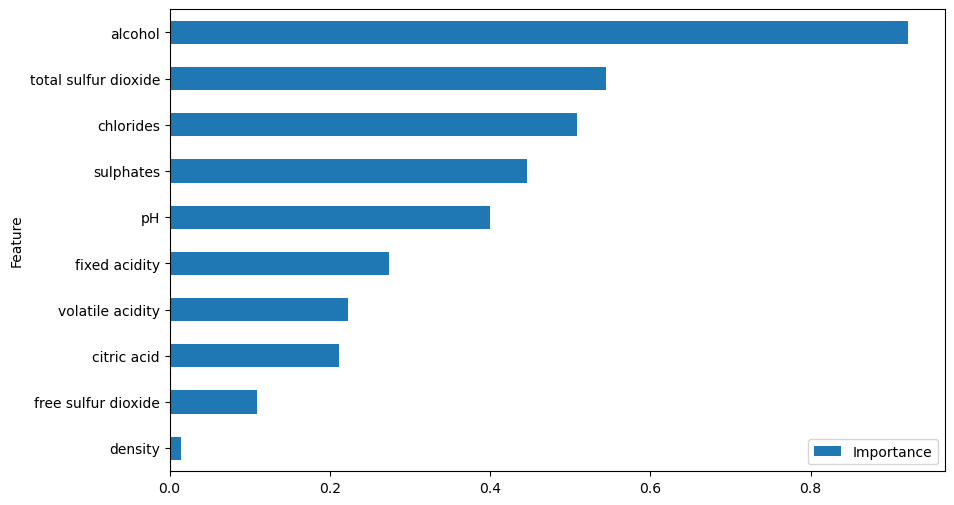

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# define model
BER_clf = BernoulliNB()
# fit model
BER_clf.fit(X_train, y_train)
# make predictions
BER_preds = BER_clf.predict(X_test)

In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# define model
DTC_clf = DecisionTreeClassifier(random_state=42)
# fit model
DTC_clf.fit(X_train, y_train)
# make predictions
DTC_preds = DTC_clf.predict(X_test)

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
# define model
SVC_clf = SVC(kernel='rbf', C=1, gamma='scale')
# fit model
SVC_clf.fit(X_train, y_train)
# make predictions
SVC_preds = SVC_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score 

# check overall accuracy %
LR_acc = accuracy_score(y_test, LR_preds)
RF_acc = accuracy_score(y_test, RF_preds)
BER_acc = accuracy_score(y_test, BER_preds)
DTC_acc = accuracy_score(y_test, DTC_preds)
SVC_acc = accuracy_score(y_test, SVC_preds)

print("Logistic Regression: ", LR_acc, "\nRandom Forest: ", RF_acc, "\nBernoulliNB: ", 
    BER_acc, "\nDecisionTreeClassifier :",DTC_acc, "\nSupport Vector Classifier: ",SVC_acc)

Logistic Regression:  0.7610294117647058 
Random Forest:  0.7463235294117647 
BernoulliNB:  0.7132352941176471 
DecisionTreeClassifier : 0.6470588235294118 
Support Vector Classifier:  0.7610294117647058


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, LR_preds))

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, LR_preds,zero_division=0))


Confusion Matrix - Logistic Regression:
[[105  30   0]
 [ 32 102   0]
 [  0   3   0]]

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       135
           1       0.76      0.76      0.76       134
           2       0.00      0.00      0.00         3

    accuracy                           0.76       272
   macro avg       0.51      0.51      0.51       272
weighted avg       0.75      0.76      0.76       272



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - RandomForest:")
print(confusion_matrix(y_test, RF_preds))

print("\nClassification Report - RandomForest:")
print(classification_report(y_test, RF_preds,zero_division=0))


Confusion Matrix - RandomForest:
[[102  33   0]
 [ 32 101   1]
 [  0   3   0]]

Classification Report - RandomForest:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       135
           1       0.74      0.75      0.75       134
           2       0.00      0.00      0.00         3

    accuracy                           0.75       272
   macro avg       0.50      0.50      0.50       272
weighted avg       0.74      0.75      0.74       272



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - BernoulliNB:")
print(confusion_matrix(y_test, BER_preds))

print("\nClassification Report - BernoulliNB:")
print(classification_report(y_test, BER_preds,zero_division=0))


Confusion Matrix - BernoulliNB:
[[ 93  42   0]
 [ 33 101   0]
 [  0   3   0]]

Classification Report - BernoulliNB:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       135
           1       0.69      0.75      0.72       134
           2       0.00      0.00      0.00         3

    accuracy                           0.71       272
   macro avg       0.48      0.48      0.48       272
weighted avg       0.71      0.71      0.71       272



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - DecisionTreeClassifier:")
print(confusion_matrix(y_test, DTC_preds))

print("\nClassification Report - DecisionTreeClassifier:")
print(classification_report(y_test, DTC_preds,zero_division=0))


Confusion Matrix - DecisionTreeClassifier:
[[92 43  0]
 [44 83  7]
 [ 0  2  1]]

Classification Report - DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       135
           1       0.65      0.62      0.63       134
           2       0.12      0.33      0.18         3

    accuracy                           0.65       272
   macro avg       0.48      0.54      0.50       272
weighted avg       0.66      0.65      0.65       272



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - Support Vector Classifier:")
print(confusion_matrix(y_test, SVC_preds))

print("\nClassification Report - Support Vector Classifier:")
print(classification_report(y_test, SVC_preds,zero_division=0))


Confusion Matrix - Support Vector Classifier:
[[106  29   0]
 [ 33 101   0]
 [  0   3   0]]

Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       135
           1       0.76      0.75      0.76       134
           2       0.00      0.00      0.00         3

    accuracy                           0.76       272
   macro avg       0.51      0.51      0.51       272
weighted avg       0.75      0.76      0.76       272



In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score  # Removed auc, roc_curve
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# clf = [
#     LogisticRegression(solver='newton-cg', penalty=None, max_iter=1000),
#     LogisticRegression(solver='lbfgs', penalty=None, max_iter=1000),
#     LogisticRegression(solver='sag', penalty=None, max_iter=1000),
#     LogisticRegression(solver='saga', penalty=None, max_iter=1000)
# ]
# clf_columns = []
# clf_compare = pd.DataFrame(columns=clf_columns)

# row_index = 0
# for alg in clf:
#     # Fit and predict
#     alg.fit(X_train, y_train)
#     predicted = alg.predict(X_test)
    
#     # Compute AUC using predict_proba
#     auc_score = roc_auc_score(y_test, alg.predict_proba(X_test), multi_class='ovr')
    
#     # Store results
#     clf_name = alg.__class__.__name__
#     clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
#     clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
#     clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted, average='weighted'), 5)
#     clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted, average='weighted'), 5)
#     clf_compare.loc[row_index, 'AUC'] = round(auc_score, 5)

#     row_index += 1

# clf_compare.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
# clf_compare


## K-Fold Cross-Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclassifier = RandomForestClassifier(max_depth=2, n_estimators=10)

In [ ]:
from sklearn.model_selection import cross_val_score

rfclassifier = RandomForestClassifier(max_depth=2, n_estimators=10)

features = red_wine_new.drop(columns=['quality_label'])

label = red_wine_new['quality_label']

scores = cross_val_score(
    estimator=rfclassifier, # model to evaluate 
    X=features, # inputs features
    y=label, # output labels
    cv=4, # how many folds
    scoring='accuracy' # model evaluation metric
)

In [ ]:
scores.round(4)

In [ ]:
scores.mean().round(4)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score
rfclassifier = RandomForestClassifier(max_depth=2, n_estimators=10)

# Create custom precision and recall scorers with zero_division set to 0
precision_scorer = make_scorer(precision_score, average='macro', zero_division=0)
recall_scorer = make_scorer(recall_score, average='macro', zero_division=0)

# Define a dictionary with scoring functions
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': precision_scorer,
    'recall_macro': recall_scorer
}

# Perform cross-validation
scores = cross_validate(
    estimator=rfclassifier,  # model to evaluate
    X=features,              # input features
    y=label,                 # output labels
    cv=4,                    # number of folds
    scoring=scoring,         # use the scoring dictionary
)

In [ ]:
scores = pd.DataFrame(scores)
scores.round(4)

In [ ]:
scores.mean().round(4)

## SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# counter = Counter(y_train)
# print('Before', counter)

# # oversampling the train dataset using SMOTE
# smt = SMOTE()
# X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# counter = Counter(y_train_sm)
# print('After', counter)

In [ ]:
# # Import necessary libraries
# from imblearn.combine import SMOTETomek
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LogisticRegression
# from collections import Counter

# # Apply SMOTETomek to address class imbalance
# smtom = SMOTETomek(random_state=139)
# X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

# # Check class distribution after SMOTETomek
# counter = Counter(y_train_smtom)
# print('After SMOTETomek:', counter)

# # Normalize the data
# scaler = MinMaxScaler()
# X_train_smtom_scaled = scaler.fit_transform(X_train_smtom)  # Fit on resampled training set
# X_test_scaled = scaler.transform(X_test)  # Transform the test set

# # Logistic Regression
# LR_model = LogisticRegression(max_iter=15000)

# # Fit model on normalized resampled training data
# LR_model.fit(X_train_smtom_scaled, y_train_smtom)

# # Make predictions on normalized test data
# LR_preds_smtom = LR_model.predict(X_test_scaled)

In [ ]:
# from sklearn.metrics import accuracy_score 

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, LR_preds_smtom))

# print("\nClassification Report:")
# print(classification_report(y_test, LR_preds_smtom))


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [34]:
X = red_wine_new.drop('quality_label', axis=1)
y = red_wine_new['quality_label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
smote = SMOTE(random_state=42, n_jobs=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

c:\Users\raclo\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [37]:
from collections import Counter

print("Original class distribution:", Counter(y_train))
print("SMOTE class distribution:", Counter(y_train_smote))

Original class distribution: Counter({1: 561, 0: 512, 2: 14})
SMOTE class distribution: Counter({2: 561, 1: 561, 0: 561})


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       128
           1       0.73      0.67      0.70       141
           2       0.00      0.00      0.00         3

    accuracy                           0.70       272
   macro avg       0.48      0.47      0.48       272
weighted avg       0.71      0.70      0.71       272



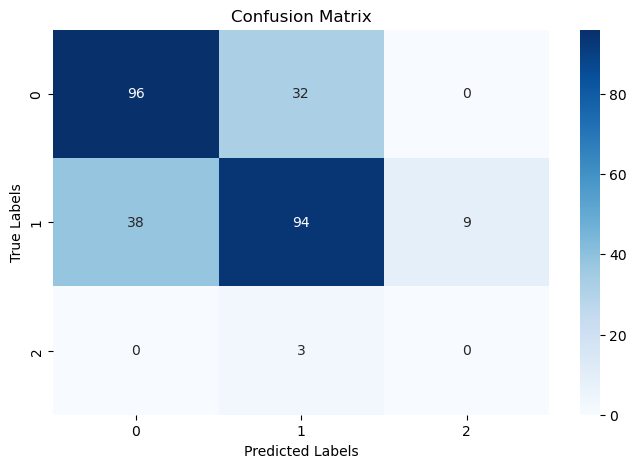

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = clf.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Randomized Search

In [242]:
n_estimators = np.arange(50,200,10)
max_depth = np.arange(5, 35, 5)
min_samples_split = np.arange(2, 15, 2)
max_features = ["sqrt", "log2", None]

param_grid = {
  'n_estimators': n_estimators,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'max_features': max_features,
}

param_grid

{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
        180, 190]),
 'max_depth': array([ 5, 10, 15, 20, 25, 30]),
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
 'max_features': ['sqrt', 'log2', None]}

In [243]:
from sklearn.model_selection import RandomizedSearchCV

# redefine model
RF_clf = RandomForestClassifier(random_state=42)

RS_grid = RandomizedSearchCV(estimator=RF_clf, param_distributions=param_grid, n_iter=10)
RS_grid

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [244]:
RS_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [246]:
print(
  'best score: ', RS_grid.best_score_,
  '\nparams: ', RS_grid.best_params_
)

'''
attempt 1
best score:   0.7534308544370693 
params: {'n_estimators': 190, 'min_samples_split': 2, 'max_features': None, 'max_depth': 30}
'''

best score:  0.7479304950746205 
params:  {'n_estimators': 150, 'min_samples_split': 2, 'max_features': None, 'max_depth': 10}


"\nattempt 1\nbest score:   0.7534308544370693 \nparams: {'n_estimators': 190, 'min_samples_split': 2, 'max_features': None, 'max_depth': 30}\n"

In [247]:
import pandas as pd

grid_results = pd.concat([
  pd.DataFrame(RS_grid.cv_results_["params"]),
  pd.DataFrame(RS_grid.cv_results_["mean_test_score"], columns=["Accuracy"])
], axis=1)

grid_results

,n_estimators,min_samples_split,max_features,max_depth,Accuracy
0,110,2,None,20,0.743322
1,140,8,None,5,0.741475
2,140,14,None,30,0.735957
3,160,8,log2,20,0.739623
4,80,10,None,25,0.732279
5,150,4,sqrt,20,0.741475
6,110,12,None,25,0.738722
7,150,2,None,10,0.747930
8,70,10,None,15,0.735957
9,130,14,None,15,0.734123
